In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'air_quality_health_impact_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print(data.head())

# Check information about the dataset
print(data.info())


   RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0         1  187.270059  295.853039   13.038560    6.639263  66.161150   
1         2  475.357153  246.254703    9.984497   16.318326  90.499523   
2         3  365.996971   84.443191   23.111340   96.317811  17.875850   
3         4  299.329242   21.020609   14.273403   81.234403  48.323616   
4         5   78.009320   16.987667  152.111623  121.235461  90.866167   

           O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621728     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   CardiovascularCases  HospitalAdmissions  HealthImpactScore  \
0                    5                   1          97.244041   
1   

In [35]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz

# Load dataset
file_path = 'air_quality_health_impact_data.csv'
data = pd.read_csv(file_path)

# Define linguistic variables
aqi_range = np.arange(0, 501, 1)  # Range for AQI
aqi_low = fuzz.trimf(aqi_range, [0, 0, 100])  # Low AQI
aqi_med = fuzz.trimf(aqi_range, [0, 100, 200])  # Medium AQI
aqi_high = fuzz.trimf(aqi_range, [100, 200, 500])  # High AQI

# Fuzzify AQI data
aqi_membership_low = fuzz.interp_membership(aqi_range, aqi_low, data['AQI'])
aqi_membership_med = fuzz.interp_membership(aqi_range, aqi_med, data['AQI'])
aqi_membership_high = fuzz.interp_membership(aqi_range, aqi_high, data['AQI'])

# Print fuzzified membership values
print("Membership values for AQI:")
print("Low:", aqi_membership_low)
print("Medium:", aqi_membership_med)
print("High:", aqi_membership_high)


Membership values for AQI:
Low: [0.         0.         0.         ... 0.         0.         0.16730743]
Medium: [0.12729941 0.         0.         ... 0.         0.         0.83269257]
High: [0.87270059 0.08214282 0.44667676 ... 0.61719401 0.97306509 0.        ]


Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')
Column 'Timestamp' not found in the dataset.


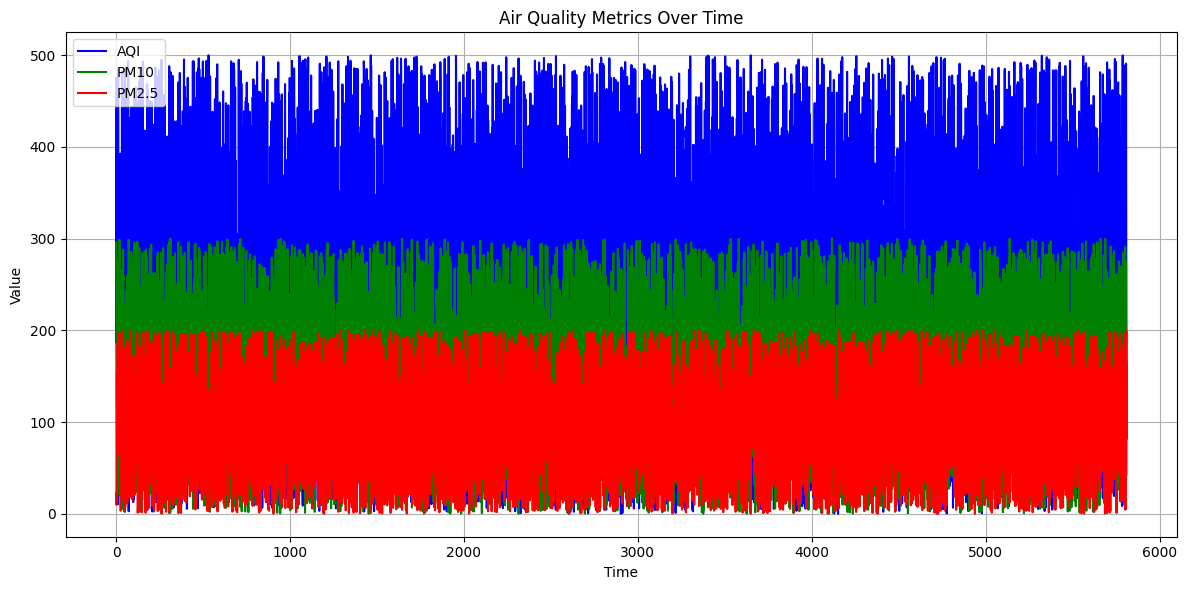

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'air_quality_health_impact_data.csv'

# Check column names to ensure 'Timestamp' exists
data = pd.read_csv(file_path)
print(data.columns)

# Assuming there is a 'Timestamp' column, convert it to datetime and set as index
if 'Timestamp' in data.columns:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data.set_index('Timestamp', inplace=True)
else:
    print("Column 'Timestamp' not found in the dataset.")

# Plotting (assuming 'AQI', 'PM10', and 'PM2_5' are columns in your dataset)
plt.figure(figsize=(12, 6))

plt.plot(data.index, data['AQI'], label='AQI', color='blue')
plt.plot(data.index, data['PM10'], label='PM10', color='green')
plt.plot(data.index, data['PM2_5'], label='PM2.5', color='red')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Air Quality Metrics Over Time')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()


Column 'Timestamp' not found in the dataset.


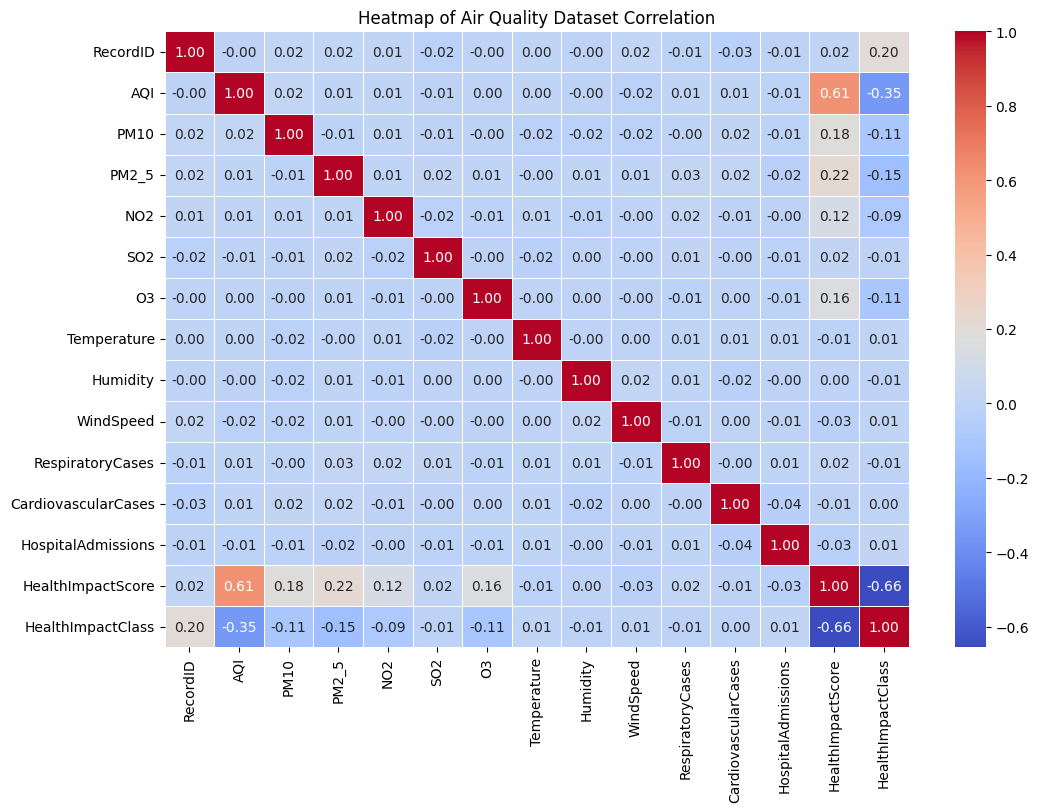

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'air_quality_health_impact_data.csv'
data = pd.read_csv(file_path)

# Data preprocessing (convert 'Timestamp' to datetime if exists)
if 'Timestamp' in data.columns:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data.set_index('Timestamp', inplace=True)
else:
    print("Column 'Timestamp' not found in the dataset.")

# Compute correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)

# Set titles and labels
plt.title('Heatmap of Air Quality Dataset Correlation')
plt.show()


Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')


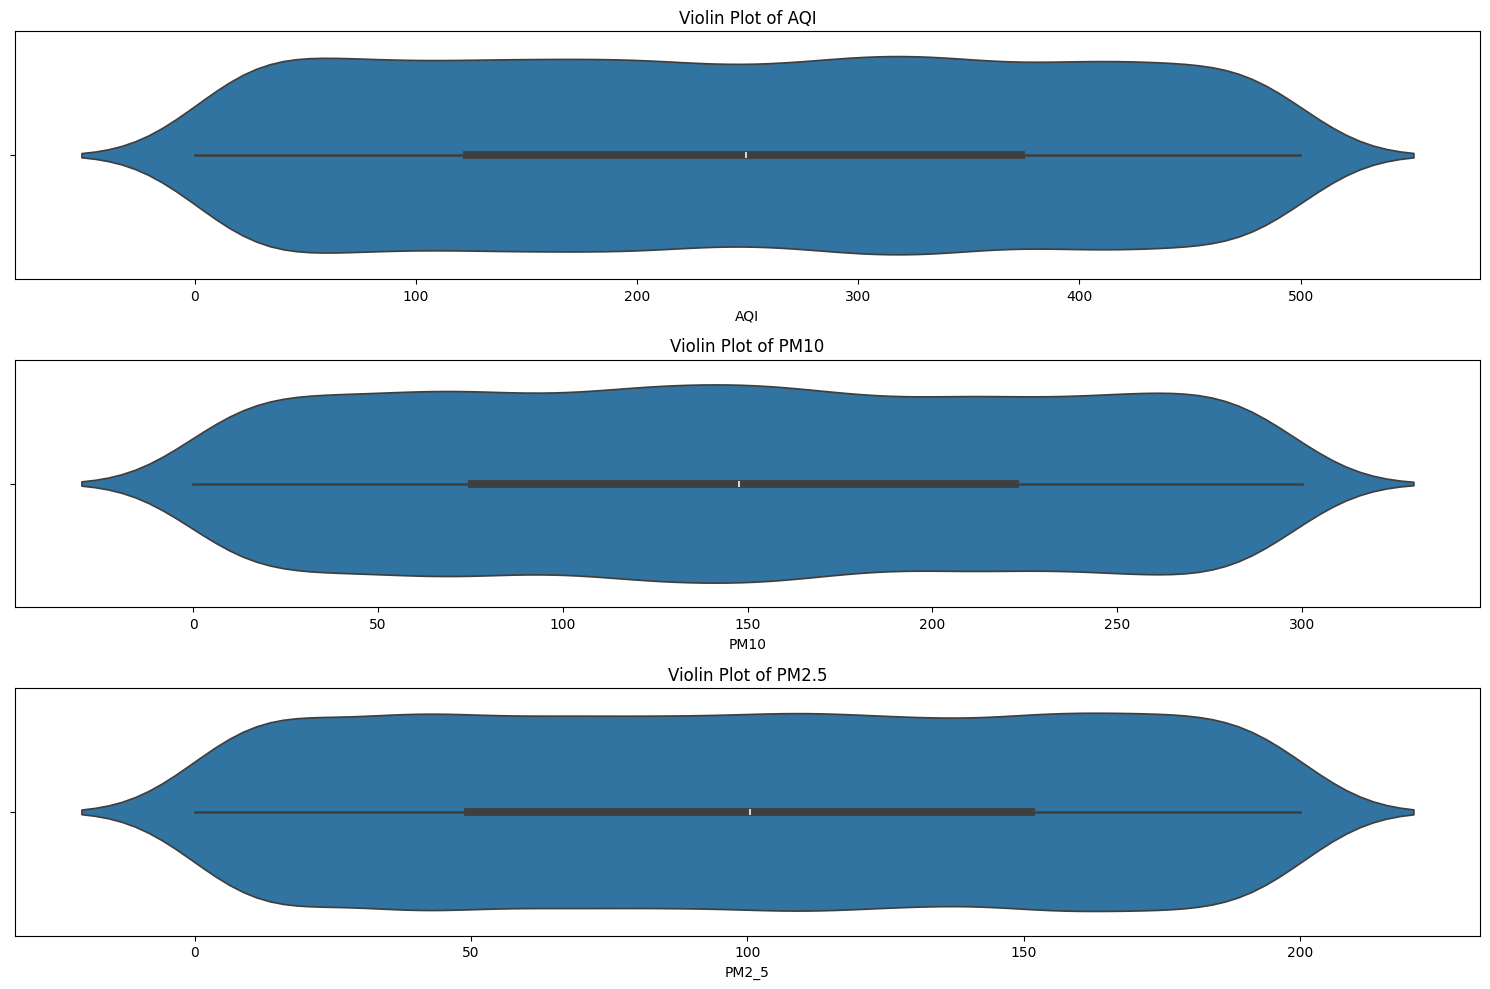

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'air_quality_health_impact_data.csv'
data = pd.read_csv(file_path)

# Memeriksa kolom yang tersedia
print(data.columns)

# Membuat Violin Plot untuk AQI, PM10, dan PM2_5
plt.figure(figsize=(15, 10))

# Violin plot untuk AQI
plt.subplot(3, 1, 1)
sns.violinplot(x=data['AQI'])
plt.title('Violin Plot of AQI')

# Violin plot untuk PM10
plt.subplot(3, 1, 2)
sns.violinplot(x=data['PM10'])
plt.title('Violin Plot of PM10')

# Violin plot untuk PM2_5
plt.subplot(3, 1, 3)
sns.violinplot(x=data['PM2_5'])
plt.title('Violin Plot of PM2.5')

plt.tight_layout()
plt.show()
